In [1]:
#TODO:

In [2]:
import pandas as pd
import json
import datetime
import matplotlib.pyplot as plt
import os
import glob
import calplot

In [3]:
SERVERS = ["ATR", "Brobot", "StockRadar"]
CARDS = ["3060", "3070", "3080", "3090", "6800", "6900"]
MERCHANTS = ["amazon", "newegg", "best buy", "bestbuy", "zotac", "photo", "microcenter"]

In [4]:
#Reads in data
df = pd.DataFrame()

for filename in glob.glob("data/*.json"):
   with open(os.path.join(os.getcwd(), filename), 'r', errors = 'ignore') as f: # open in readonly mode
    
        #Read data into temporary dataframe
        data = json.load(f)
        temp_df = pd.DataFrame.from_dict(pd.json_normalize(data)['messages'][0])
        
        #Filter out reactions, embeds, etc
        temp_df = temp_df[['id', 'type', 'timestamp', 'timestampEdited', 'content', 'author']]
        
        
        #Parse the server and the card being tracked from filename
        server = [x for x in SERVERS if x in filename]
        card = [x for x in CARDS if x in filename]
        if len(server) > 1 or len(card) > 1:
            print("Error parsing filenames, possible ambiguity")
        
        #Add server and card as columns
        temp_df['server'] = server[0]
        temp_df['card'] = card[0]
        
        
        #Create df or append if it exists
        if df.empty:
            df = temp_df
        else:
            df = df.append(temp_df)

In [12]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [6]:
def return_hour(dt):
    return dt.hour

hrs = df['timestamp'].apply(return_hour)

In [7]:
for card in CARDS:
    
    temp = df[df['card'] == card]

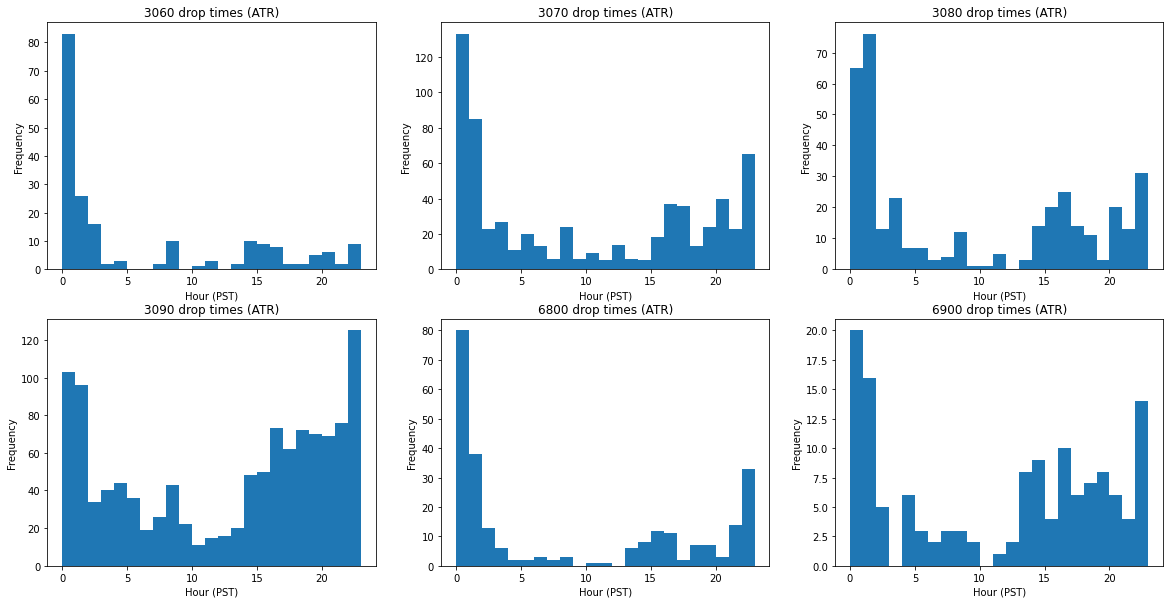

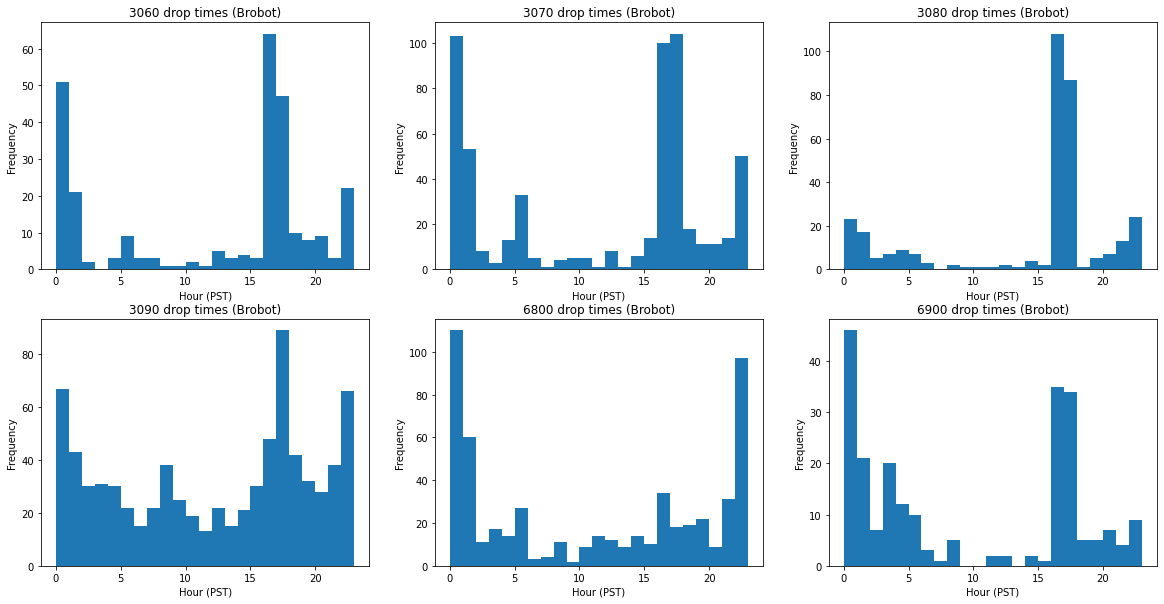

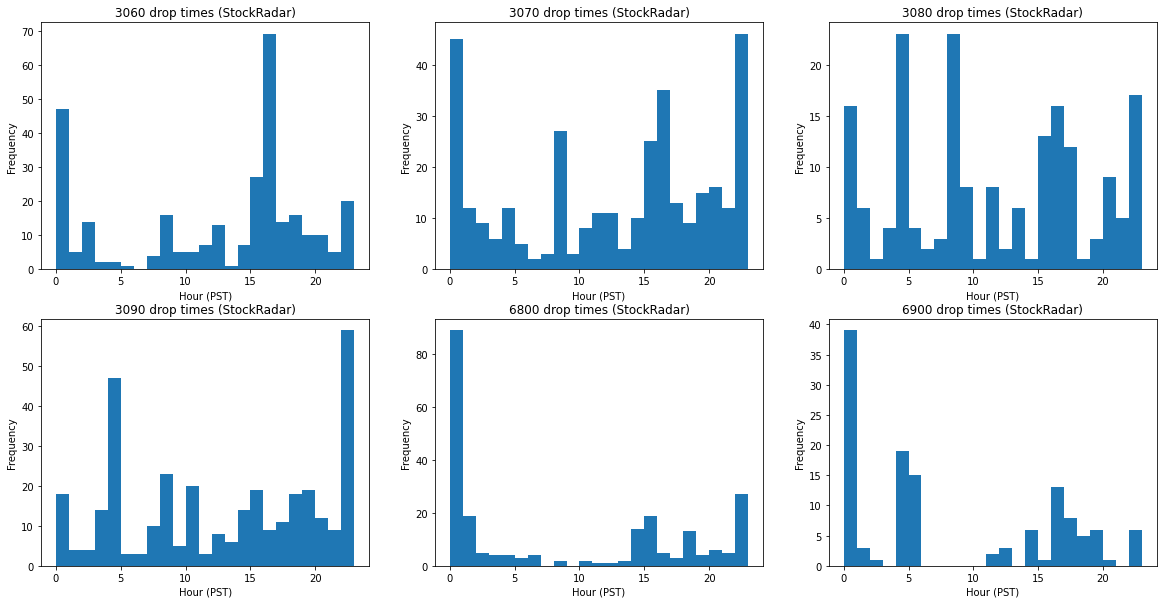

In [8]:
for server in SERVERS:
    x = 0
    y = 0
    fig, axs = plt.subplots(2, 3, figsize = (20, 10))
    
    for card in CARDS:

        temp = df[(df['card'] == card) & (df['server'] == server)]

        hrs = temp['timestamp'].apply(return_hour)

        axs[y, x].hist(hrs, bins = 23)
        axs[y, x].set_title("{} drop times ({})".format(card, server))
        axs[y, x].set_xlabel("Hour (PST)")
        axs[y, x].set_ylabel("Frequency")
        x += 1
        if x >= 3:
            x = 0
            y += 1
    plt.savefig("{}.png".format(server))

In [19]:
df = df.set_index(pd.to_datetime(df['timestamp']))

In [24]:
events = df.groupby(by=[df.index.date]).count()['id']
events.index = events.index.astype('datetime64[ns]')

(<Figure size 900x244.8 with 3 Axes>,
 array([<AxesSubplot:ylabel='2020'>, <AxesSubplot:ylabel='2021'>],
       dtype=object))

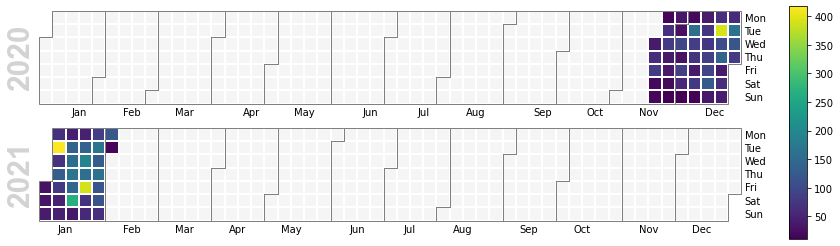

In [25]:
calplot.calplot(events)